In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [19]:
dataset = pd.read_csv('Weather.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_14404\3126333504.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('Weather.csv')


In [20]:
print(dataset.shape)

(119040, 31)


In [21]:
dataset.describe()[:10]

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


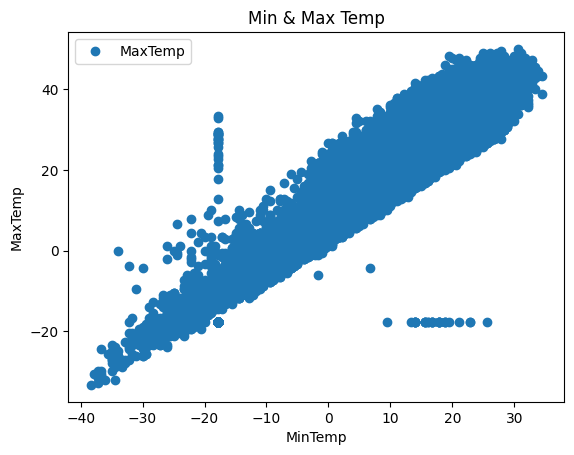

In [22]:
dataset.plot(x = 'MinTemp', y ='MaxTemp',style='o')
plt.title('Min & Max Temp')
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.show()

### train & test set

In [23]:
x = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### training

In [25]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### test

In [26]:
y_pred = model.predict(x_test)

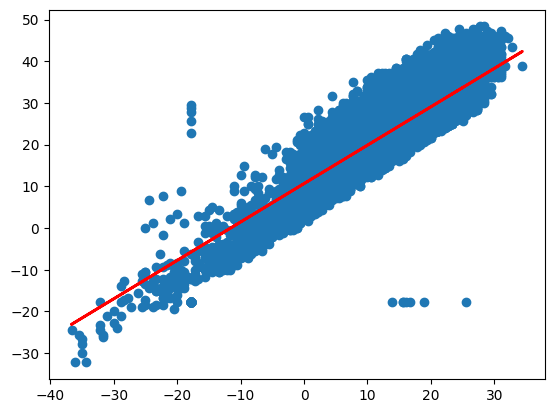

In [27]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.show()

### compare true data & predict data

In [28]:
df = pd.DataFrame({'Actually': y_test.flatten(),
                  'Predicted': y_pred.flatten()})

In [29]:
print(df.head())

    Actually  Predicted
0  28.888889  33.670351
1  31.111111  30.091251
2  27.222222  26.512151
3  28.888889  31.113851
4  23.333333  15.774852


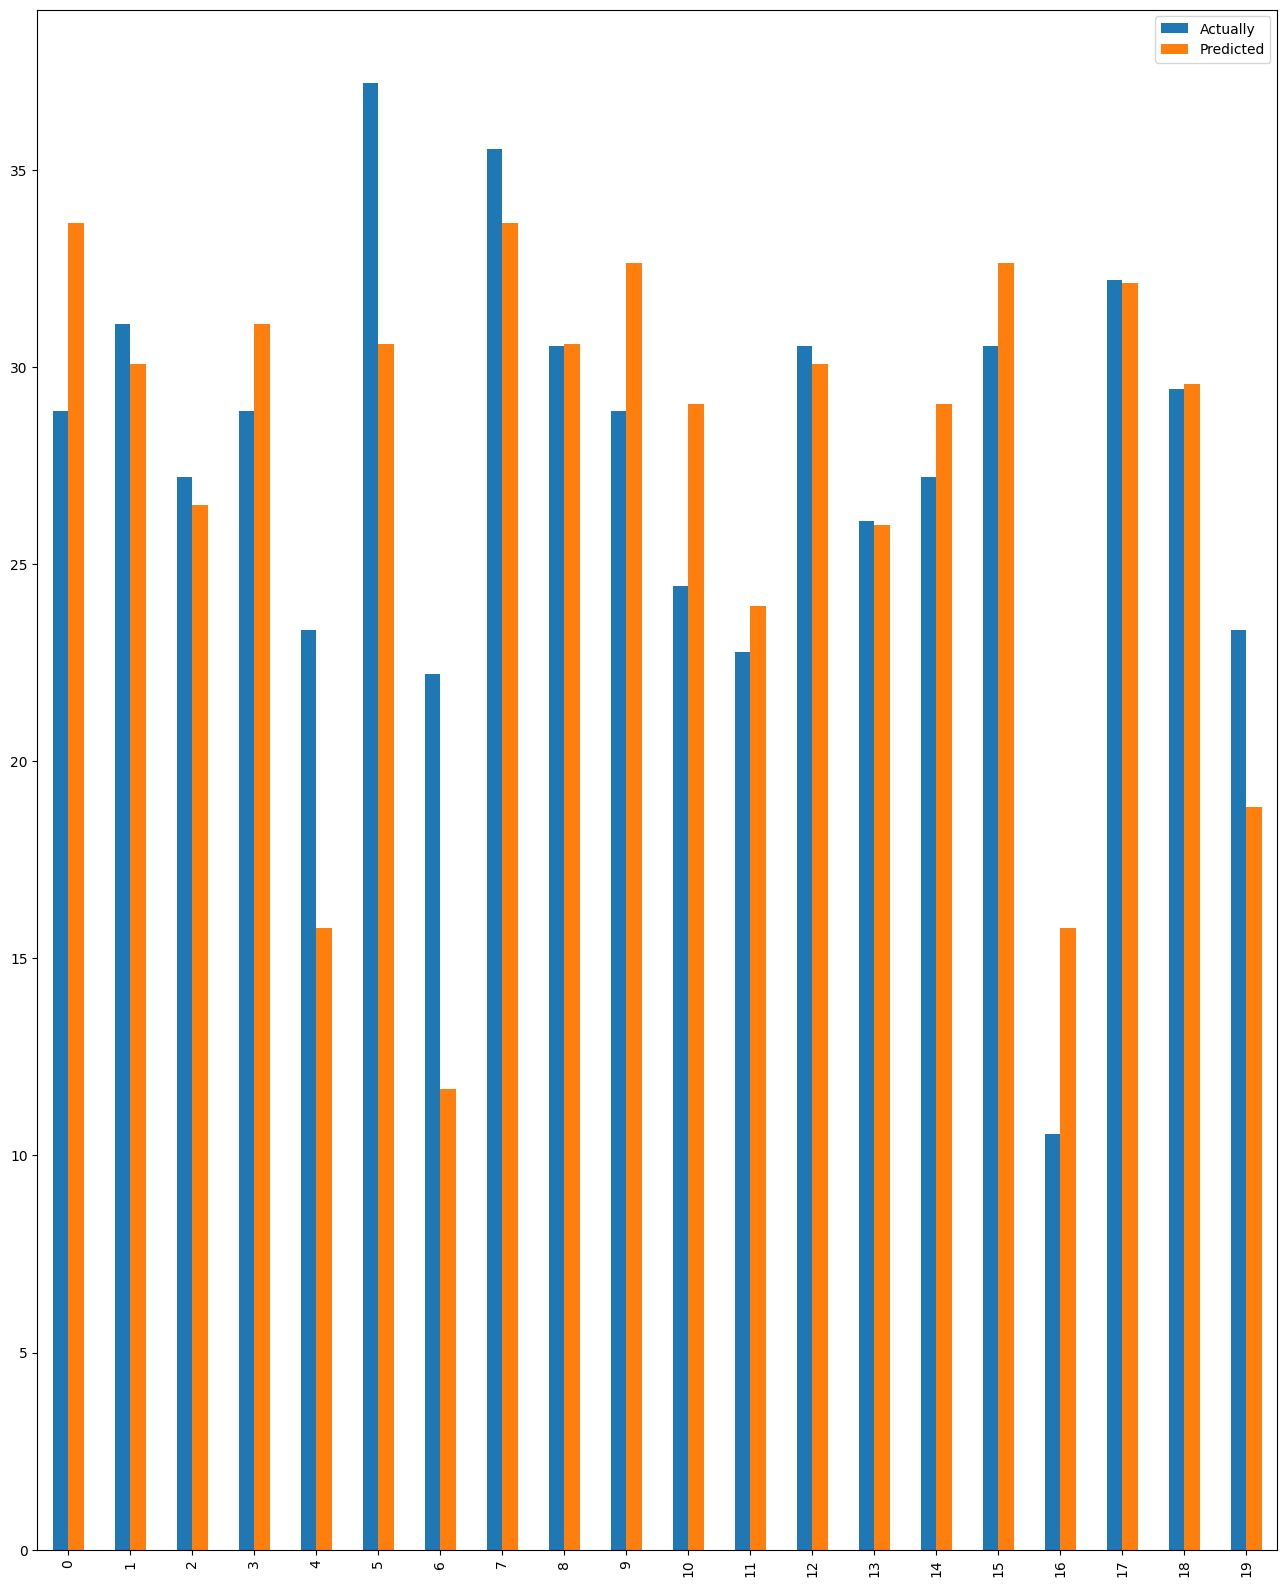

In [30]:
df1 = df.head(20)
df1.plot(kind='bar',figsize=(16,20))
plt.show()

In [32]:
print("MAE =",metrics.mean_absolute_error(y_test,y_pred))
print("MSE =",metrics.mean_squared_error(y_test,y_pred))
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Score =",metrics.r2_score(y_test,y_pred))

MAE = 3.199329178378527
MSE = 17.63156809756844
RMSE = 4.198996082109203
Score = 0.7670218843587765
